In [1]:
# 1. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# 2. Load the Dataset
df = pd.read_csv("C:\\Users\\chall\\OneDrive\\Desktop\\KNN\\KNN\\Zoo.csv")
print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
df.head()

✅ Data Loaded Successfully!
Shape: (101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# 3. Data Information and Basic Stats
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
# 4. Check for Missing Values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


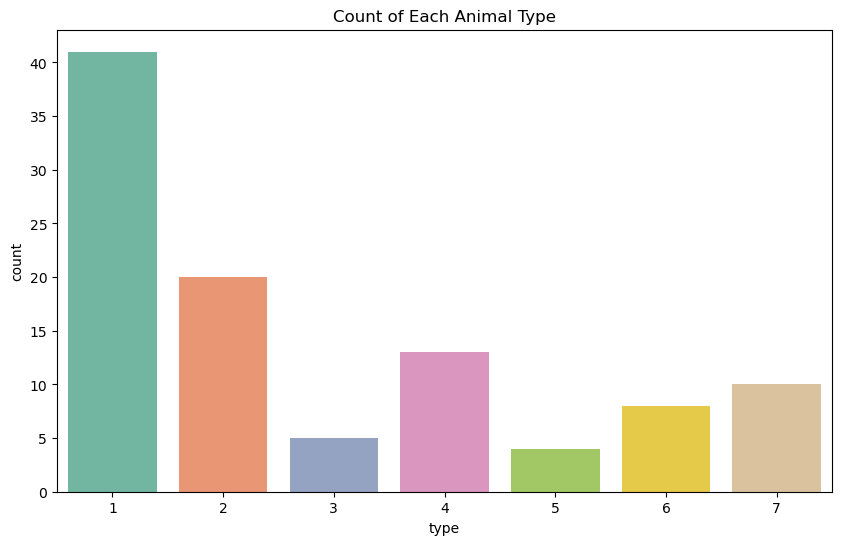

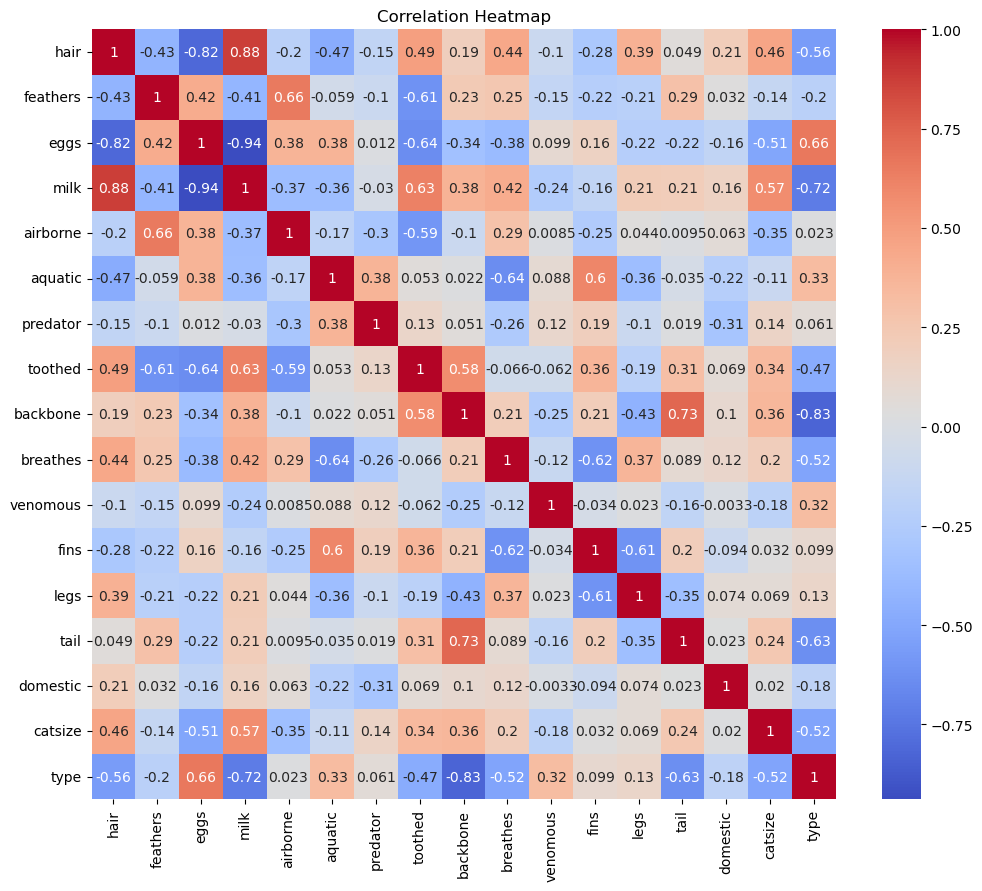

In [6]:
# 5. EDA - Visualizations
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Count of Each Animal Type")
plt.show()

# Compute correlation only on numeric columns (to fix the error)
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# 6. Drop All Non-Numeric Columns Automatically
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("\nNon-numeric columns found:", list(non_numeric_cols))

# Drop them
df = df.drop(non_numeric_cols, axis=1)
print("\n✅ Non-numeric columns dropped. Remaining columns:")
print(df.columns)


Non-numeric columns found: ['animal name']

✅ Non-numeric columns dropped. Remaining columns:
Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')


In [11]:
# 7. Feature and Target Separation
X = df.drop('type', axis=1)
y = df['type']

In [12]:
# 8. Standardization (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# 9. Split Dataset (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# 10. Build KNN Model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# 11. Model Evaluation
y_pred = knn.predict(X_test)

print("\n✅ Accuracy Score:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy Score: 1.0

Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



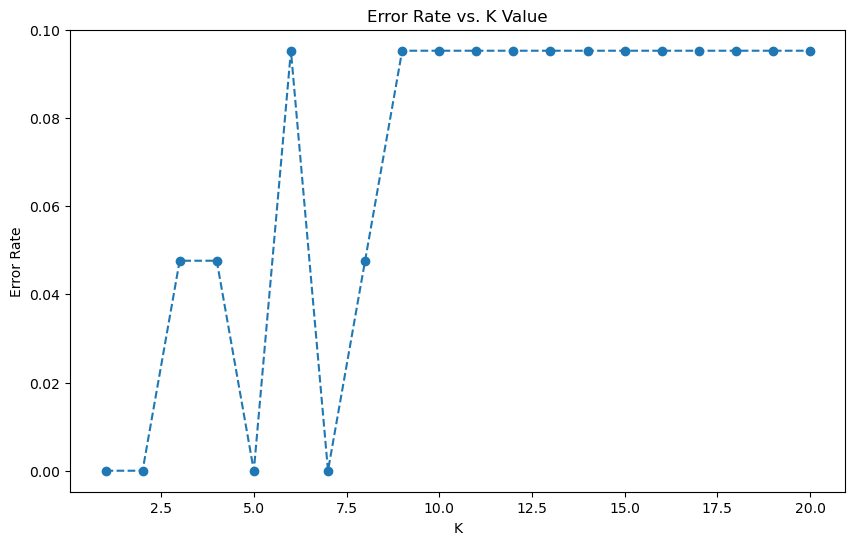

In [16]:
# 12. Find Best K Value
error_rate = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, marker='o', linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

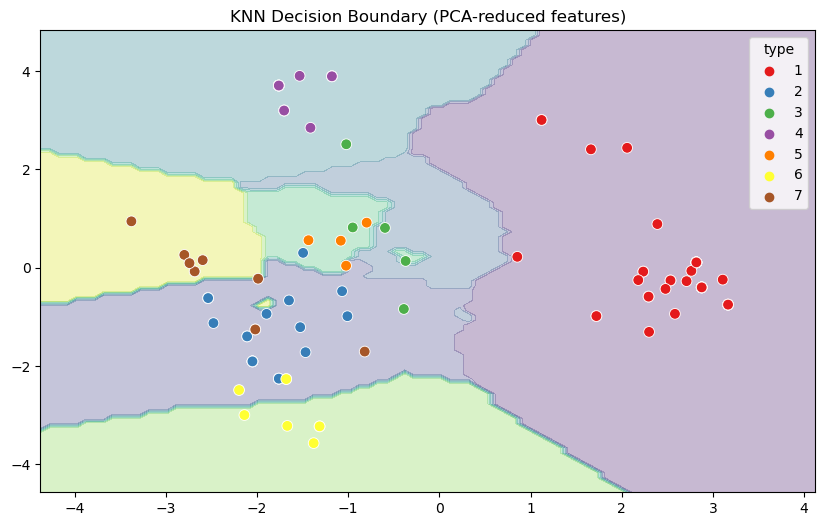

In [18]:
# 13. Visualizing Decision Boundary using PCA (2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_pca, y)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1', s=60)
plt.title("KNN Decision Boundary (PCA-reduced features)")
plt.show()

In [1]:
from IPython.display import Markdown as md

display(md("""
# KNN Interview Questions and Answers

---

## 1. What are the key hyperparameters in KNN?

KNN (K-Nearest Neighbours) has several important hyperparameters that control its behavior:

###  a. `n_neighbors`
- The number of nearest neighbors (K) to use for classification.
- Small K → can overfit (too sensitive to noise).  
- Large K → can underfit (too smooth).

### b. `metric`
- The distance measure used to find nearest neighbors.
  - Euclidean (default)
  - Manhattan
  - Minkowski
  - Cosine
  - Hamming

### c. `weights`
- Determines how each neighbor contributes to the prediction:
  - `'uniform'`: all neighbors are equally weighted.
  - `'distance'`: closer neighbors have more influence.

### d. `p`
- The power parameter for the Minkowski distance.
  - `p = 1` → Manhattan distance  
  - `p = 2` → Euclidean distance (default)

### e. `algorithm`
- The method used to compute nearest neighbors:
  - `'auto'`, `'ball_tree'`, `'kd_tree'`, or `'brute'`.

---

## 2. What distance metrics can be used in KNN?

KNN relies on measuring the similarity (distance) between points.

| Distance Metric | Formula | When to Use |
|------------------|----------|-------------|
| **Euclidean Distance** | √Σ(xᵢ - yᵢ)² | Continuous numerical data |
| **Manhattan Distance** | Σ|xᵢ - yᵢ| | Grid or absolute difference data |
| **Minkowski Distance** | (Σ|xᵢ - yᵢ|ᵖ)¹/ᵖ | Generalized form (choose p=1 or 2) |
| **Cosine Distance** | 1 - (A·B / |A||B|) | Text or directional data |
| **Hamming Distance** | Count of mismatches | Binary or categorical data |

---

## 3. Advantages of KNN

-> Easy to implement and understand  
-> No training phase (lazy learner)  
-> Works for both classification & regression  
-> Performs well on small datasets  

---

## 4. Limitations of KNN

-> Computationally expensive for large datasets  
-> Sensitive to feature scaling and irrelevant data  
-> Struggles with high-dimensional data  
-> Choice of K and distance metric is critical  

---

## 5. How to Choose the Best Value of K

- Use cross-validation to tune K.  
- Plot Error Rate vs. K to find the optimal value.  
- Rule of thumb: `K ≈ √N` (where N = number of samples).  
- Use odd K for binary classification to avoid ties.

---
"""))



# KNN Interview Questions and Answers

---

## 1. What are the key hyperparameters in KNN?

KNN (K-Nearest Neighbours) has several important hyperparameters that control its behavior:

###  a. `n_neighbors`
- The number of nearest neighbors (K) to use for classification.
- Small K → can overfit (too sensitive to noise).  
- Large K → can underfit (too smooth).

### b. `metric`
- The distance measure used to find nearest neighbors.
  - Euclidean (default)
  - Manhattan
  - Minkowski
  - Cosine
  - Hamming

### c. `weights`
- Determines how each neighbor contributes to the prediction:
  - `'uniform'`: all neighbors are equally weighted.
  - `'distance'`: closer neighbors have more influence.

### d. `p`
- The power parameter for the Minkowski distance.
  - `p = 1` → Manhattan distance  
  - `p = 2` → Euclidean distance (default)

### e. `algorithm`
- The method used to compute nearest neighbors:
  - `'auto'`, `'ball_tree'`, `'kd_tree'`, or `'brute'`.

---

## 2. What distance metrics can be used in KNN?

KNN relies on measuring the similarity (distance) between points.

| Distance Metric | Formula | When to Use |
|------------------|----------|-------------|
| **Euclidean Distance** | √Σ(xᵢ - yᵢ)² | Continuous numerical data |
| **Manhattan Distance** | Σ|xᵢ - yᵢ| | Grid or absolute difference data |
| **Minkowski Distance** | (Σ|xᵢ - yᵢ|ᵖ)¹/ᵖ | Generalized form (choose p=1 or 2) |
| **Cosine Distance** | 1 - (A·B / |A||B|) | Text or directional data |
| **Hamming Distance** | Count of mismatches | Binary or categorical data |

---

## 3. Advantages of KNN

-> Easy to implement and understand  
-> No training phase (lazy learner)  
-> Works for both classification & regression  
-> Performs well on small datasets  

---

## 4. Limitations of KNN

-> Computationally expensive for large datasets  
-> Sensitive to feature scaling and irrelevant data  
-> Struggles with high-dimensional data  
-> Choice of K and distance metric is critical  

---

## 5. How to Choose the Best Value of K

- Use cross-validation to tune K.  
- Plot Error Rate vs. K to find the optimal value.  
- Rule of thumb: `K ≈ √N` (where N = number of samples).  
- Use odd K for binary classification to avoid ties.

---
